In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


**IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

**DATA INFORMATION**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
dataset.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


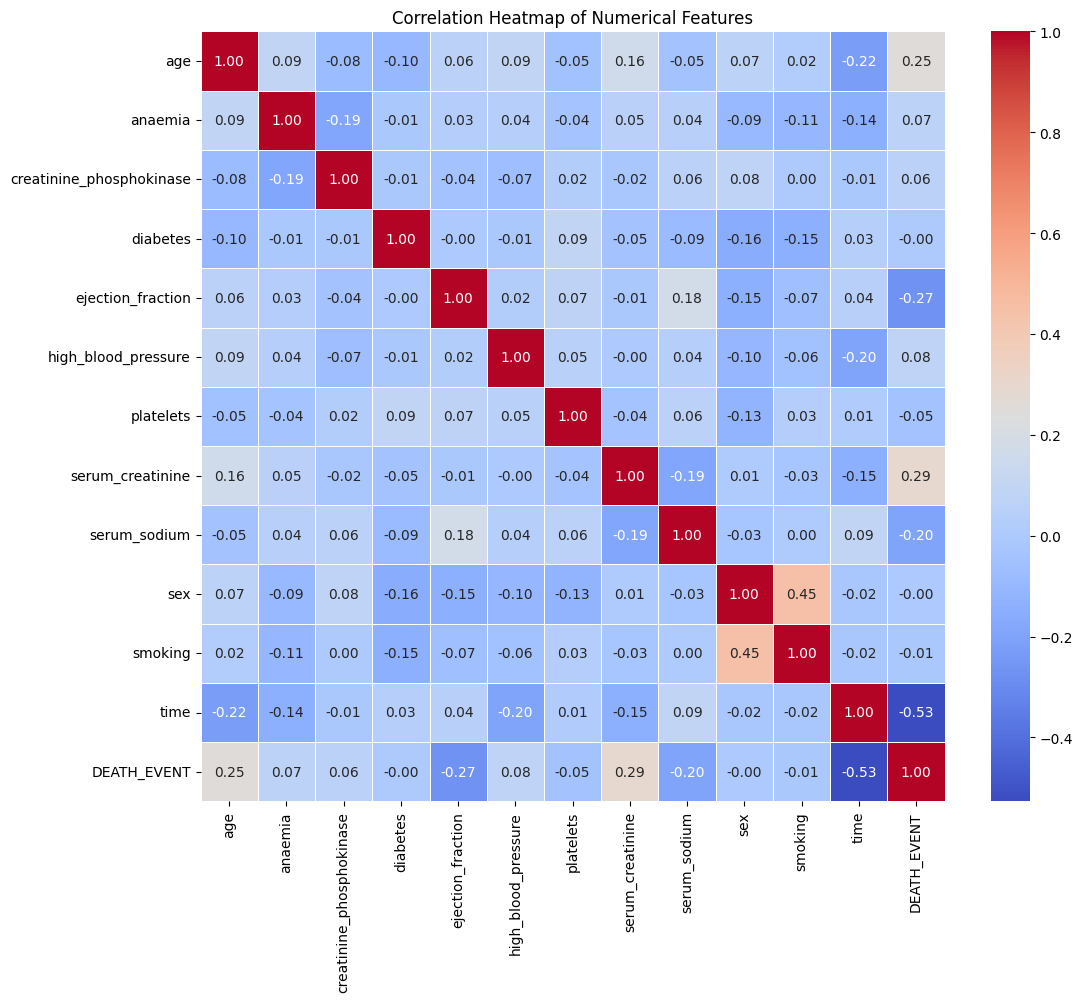

In [6]:
# Calculate correlation matrix
corr_matrix = dataset.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
X = dataset.drop(columns=['DEATH_EVENT'])  # Features
y = dataset['DEATH_EVENT']  # Target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        35
           1       0.58      0.44      0.50        25

    accuracy                           0.63        60
   macro avg       0.62      0.61      0.61        60
weighted avg       0.63      0.63      0.62        60


Confusion Matrix:
[[27  8]
 [14 11]]


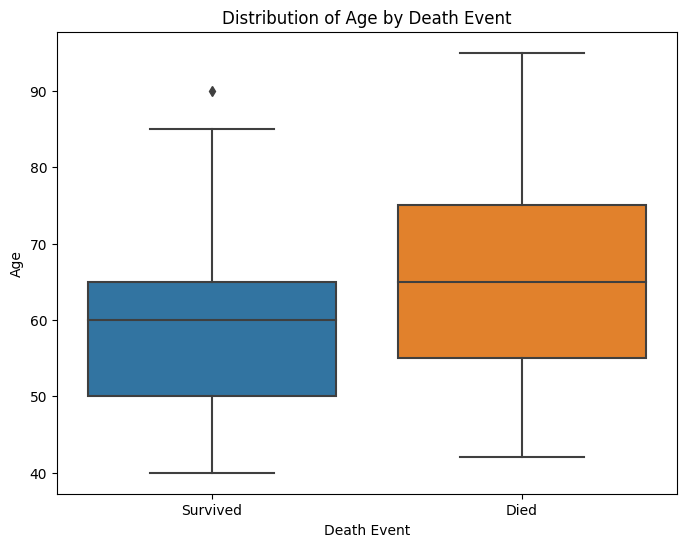

In [9]:
# Box plot for 'age' against 'DEATH_EVENT'
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='DEATH_EVENT', y='age')
plt.title('Distribution of Age by Death Event')
plt.xlabel('Death Event')
plt.ylabel('Age')
plt.xticks([0, 1], ['Survived', 'Died'])
plt.show()



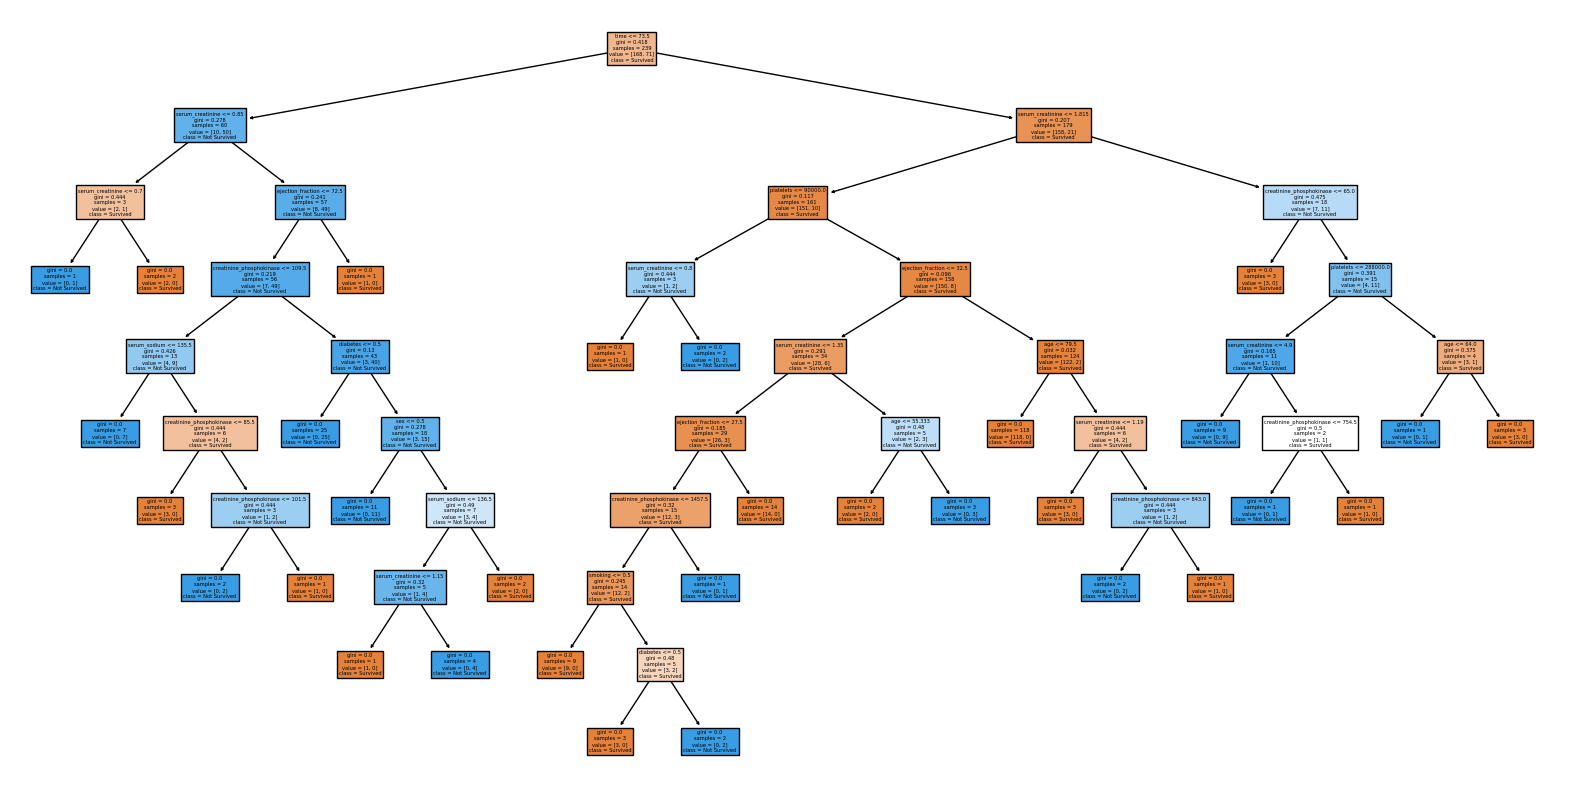

In [10]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Survived', 'Not Survived'], filled=True)
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Reinitialize the classifier with the best parameters
clf_best = DecisionTreeClassifier(random_state=42, **best_params)

# Train the classifier with best parameters
clf_best.fit(X_train, y_train)

# Predictions on the test set with best classifier
y_pred_best = clf_best.predict(X_test)

# Evaluate the best classifier
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with best parameters:", accuracy_best)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy with best parameters: 0.6833333333333333


In [12]:
# Get feature importances
feature_importances = clf_best.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Print feature importance rankings
print("Feature Importance Rankings:")
for i, feature in enumerate(X.columns[indices]):
    print(f"{i+1}. {feature}: {feature_importances[indices[i]]}")


Feature Importance Rankings:
1. time: 0.7069563753511362
2. serum_creatinine: 0.19442097984783718
3. creatinine_phosphokinase: 0.041255796757666184
4. platelets: 0.03428495653420497
5. ejection_fraction: 0.023081891509155367
6. smoking: 0.0
7. sex: 0.0
8. serum_sodium: 0.0
9. high_blood_pressure: 0.0
10. diabetes: 0.0
11. anaemia: 0.0
12. age: 0.0
